Here’s the mystery we’re going to solve: ***which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***


A borough is just a fancy word for district. You may be familiar with the five boroughs of New York… well, there are 32 boroughs within Greater London [(here's some info for the curious)](https://en.wikipedia.org/wiki/London_boroughs). Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.


#### 1.1. Importing Libraries

In [ ]:
# Let's import the pandas, numpy libraries as pd, and np respectively.
import numpy as np
import pandas as pd

# Load the pyplot collection of functions from matplotlib, as plt
from matplotlib import pyplot as plt

#### 1.2.  Loading the data
Your data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets.

In [ ]:
# First, make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file.
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

In [ ]:
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91448.98487,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,...,43958.48001,44803.42878,45544.52227,48527.52339,56701.5961,74435.76052,64018.87894,54705.1579,NaN,53202.77128
2,1995-02-01,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,...,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,NaN,53096.1549
3,1995-03-01,79120.70256,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,...,44434.8681,45200.46775,45383.82395,49442.17973,56171.18278,73896.84204,64113.60858,53583.07667,NaN,53201.2843
4,1995-04-01,77101.20804,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.899,68610.04641,82188.90498,...,44267.7796,45614.34341,46124.23045,49455.93299,56567.89582,74455.28754,64623.22395,54786.01938,NaN,53590.8548


**2.2. Cleaning the data**


In [ ]:
data = properties.transpose()
data.head()

,0,1,2,3,4,5,6,7,8,9,...,349,350,351,352,353,354,355,356,357,358
Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,...,2024-01-01 00:00:00,2024-02-01 00:00:00,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00
City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,104473.1096,...,838041,840027,831409,810395,814092,809408,749503,756112,726259,716754
Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,51471.61353,...,329413,328665,333559,335332,336382,334095,341625,337077,338047,338137
Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,93273.12245,...,575091,562453,569243,573831,581268,586101,589731,595477,589992,586982
Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,64509.54767,...,393023,393050,394225,396993,397897,402775,404066,408244,409354,409969


In [ ]:
# Resets Index and preserve the borough - values
data.reset_index(inplace=True)
data.head()

,index,0,1,2,3,4,5,6,7,8,...,349,350,351,352,353,354,355,356,357,358
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2024-01-01 00:00:00,2024-02-01 00:00:00,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,838041,840027,831409,810395,814092,809408,749503,756112,726259,716754
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,329413,328665,333559,335332,336382,334095,341625,337077,338047,338137
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,575091,562453,569243,573831,581268,586101,589731,595477,589992,586982
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,393023,393050,394225,396993,397897,402775,404066,408244,409354,409969


In [ ]:
data.columns

Index(['index',       0,       1,       2,       3,       4,       5,       6,
             7,       8,
       ...
           349,     350,     351,     352,     353,     354,     355,     356,
           357,     358],
      dtype='object', length=360)

In [ ]:
column_names = data.iloc[0]
column_names

,0
index,Unnamed: 0
0,NaT
1,1995-01-01 00:00:00
2,1995-02-01 00:00:00
3,1995-03-01 00:00:00
...,...
354,2024-06-01 00:00:00
355,2024-07-01 00:00:00
356,2024-08-01 00:00:00
357,2024-09-01 00:00:00


In [ ]:
data.columns = column_names
data.drop(index=0, inplace=True)
data.head()


,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2024-01-01 00:00:00,2024-02-01 00:00:00,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,838041,840027,831409,810395,814092,809408,749503,756112,726259,716754
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,329413,328665,333559,335332,336382,334095,341625,337077,338047,338137
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,575091,562453,569243,573831,581268,586101,589731,595477,589992,586982
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,393023,393050,394225,396993,397897,402775,404066,408244,409354,409969
5,Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,...,519978,524873,515137,503053,506044,532356,530953,547131,544935,553670


In [ ]:
cols = data.columns

data_column_names = [str(i).rstrip(' 00:00:00') if  str(i).endswith('00:00:00') else 'zip_code' if str(i).startswith('NaT') else str('borough') for i in cols ]
#data_column_names

In [ ]:
data.columns = data_column_names
data.head()

,borough,zip_code,1995-01-01,1995-02-01,1995-03-01,1995-04-01,1995-05-01,1995-06-01,1995-07-01,1995-08-01,...,2024-01-01,2024-02-01,2024-03-01,2024-04-01,2024-05-01,2024-06-01,2024-07-01,2024-08-01,2024-09-01,2024-10-01
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,838041,840027,831409,810395,814092,809408,749503,756112,726259,716754
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,329413,328665,333559,335332,336382,334095,341625,337077,338047,338137
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,575091,562453,569243,573831,581268,586101,589731,595477,589992,586982
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,393023,393050,394225,396993,397897,402775,404066,408244,409354,409969
5,Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,...,519978,524873,515137,503053,506044,532356,530953,547131,544935,553670


**2.3. Cleaning the data (part 2)**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 1 to 48
Columns: 360 entries, borough to 2024-10-01
dtypes: object(360)
memory usage: 135.1+ KB


**2.4.Transforming the data**

In [ ]:
print(data.columns)
df = data.melt(id_vars=['borough','zip_code'],var_name='month',value_name='price')

Index(['borough', 'zip_code', '1995-01-01', '1995-02-01', '1995-03-01',
       '1995-04-01', '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
       ...
       '2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01', '2024-05-01',
       '2024-06-01', '2024-07-01', '2024-08-01', '2024-09-01', '2024-10-01'],
      dtype='object', length=360)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17184 entries, 0 to 17183
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   borough   17184 non-null  object
 1   zip_code  16110 non-null  object
 2   month     17184 non-null  object
 3   price     16110 non-null  object
dtypes: object(4)
memory usage: 537.1+ KB


In [ ]:
df.astype({'price':'float64'}).dtypes

,0
borough,object
zip_code,object
month,object
price,float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17184 entries, 0 to 17183
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   borough   17184 non-null  object
 1   zip_code  16110 non-null  object
 2   month     17184 non-null  object
 3   price     16110 non-null  object
dtypes: object(4)
memory usage: 537.1+ KB


In [ ]:
#Setting the price as Float price
df['price'] = df['price'].astype('float64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17184 entries, 0 to 17183
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   borough   17184 non-null  object 
 1   zip_code  16110 non-null  object 
 2   month     17184 non-null  object 
 3   price     16110 non-null  float64
dtypes: float64(1), object(3)
memory usage: 537.1+ KB


**2.5. Cleaning the data (part 3)**
There are only 32 London Boroughs. Filtering only the 32 London Boroughs

In [ ]:
unique_boroughs = df['borough'].unique()
unique_boroughs.size # o/p : 48
unique_boroughs

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Unnamed: 34',
       'Inner London', 'Outer London', 'Unnamed: 37', 'NORTH EAST',
       'NORTH WEST', 'YORKS & THE HUMBER', 'EAST MIDLANDS',
       'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST',
       'SOUTH WEST', 'Unnamed: 47', 'England'], dtype=object)

**Removing unexpected boroughs**

In [ ]:
# Removing the Unnamed boroughs
df_borough_unnamed = df[df['borough'].str.startswith('Unnamed')]  # Fetching all the Unnamed boroughs
gp_by_borough = df_borough_unnamed.groupby('borough')

df.drop(df_borough_unnamed.index, inplace=True) # Dropping all the the observations whose boroughs starts with name Unnamed
print(df.shape) # After removing the unnamed boroughs

(16110, 4)


In [ ]:
# Removing non-32 boroughs
unique_boroughs = df['borough'].unique()
unique_boroughs.size    # 45
unique_boroughs

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Inner London',
       'Outer London', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'England'], dtype=object)

In [ ]:
# Fetching the list of non-32 boroughs
non_boroughs_london = ['City of London','Inner London',
       'Outer London', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'England']

df_non_london_borughs = df[df['borough'].isin(non_boroughs_london)]

#df_non_london_borughs

df.drop(df_non_london_borughs.index, inplace=True)
df.shape # fetching the final df which has only the 32 boroughs

(11456, 4)

In [ ]:
df['borough'].unique().size

32

In [ ]:
df['borough'].unique()

array(['Barking & Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
       'Hammersmith & Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington & Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
      dtype=object)

In [ ]:
# Checking null values
df.isnull().mean()*100

,0
borough,0.0
zip_code,0.0
month,0.0
price,0.0


**2.6. Visualizing the data**

Subsetting only Newham Borough for analysis to see the trend over the years.

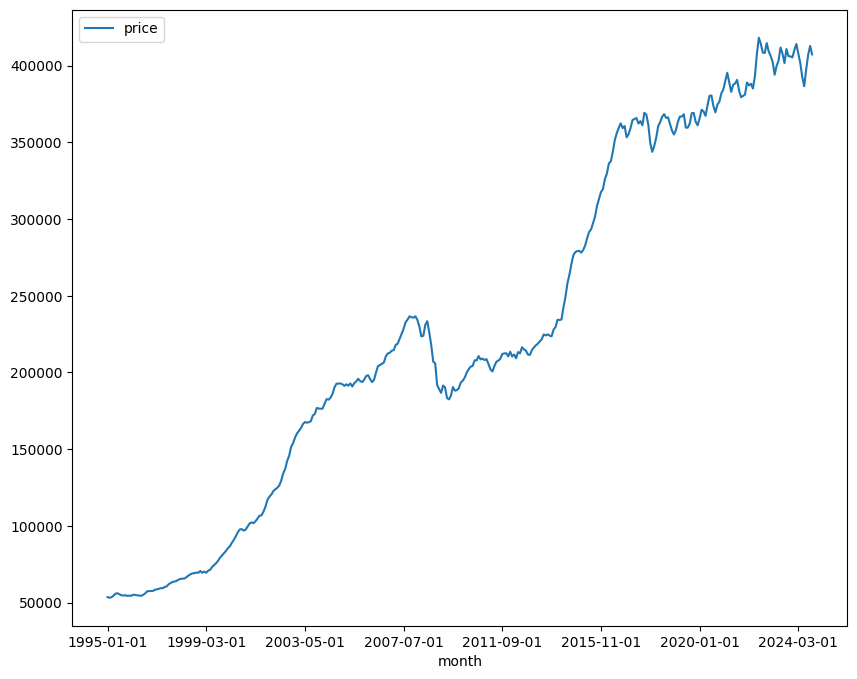

In [ ]:
df_newham = df[df['borough']=='Newham']
df_newham.head()
df_newham.plot(kind='line', x='month', y='price',figsize=(10, 8))
plt.show()

***Analysis year wise trends in price***

In [ ]:
df['month'].unique().size

358

In [ ]:
df_newham['year'] = list(map(lambda x: x[:4] , df_newham['month']))
df_newham.head()


<ipython-input-277-78d888bad98b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_newham['year'] = list(map(lambda x: x[:4] , df_newham['month']))


,borough,zip_code,month,price,year
24,Newham,E09000025,1995-01-01,53539.31919,1995
72,Newham,E09000025,1995-02-01,53153.88306,1995
120,Newham,E09000025,1995-03-01,53458.26393,1995
168,Newham,E09000025,1995-04-01,54479.75395,1995
216,Newham,E09000025,1995-05-01,55803.95958,1995


In [ ]:
# Adding column year to the dataframe
df['year'] = list(map(lambda x: x[:4], df['month']))
df['year'] = df['year'].astype('int64')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 11456 entries, 1 to 17168
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   borough   11456 non-null  object 
 1   zip_code  11456 non-null  object 
 2   month     11456 non-null  object 
 3   price     11456 non-null  float64
 4   year      11456 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 537.0+ KB
None


,borough,zip_code,month,price,year
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660,1995
2,Barnet,E09000003,1995-01-01,93284.51832,1995
3,Bexley,E09000004,1995-01-01,64958.09036,1995
4,Brent,E09000005,1995-01-01,71306.56698,1995
5,Bromley,E09000006,1995-01-01,81671.47692,1995


In [ ]:
year_list = df['month'].str[:4].unique()
type(year_list)

numpy.ndarray

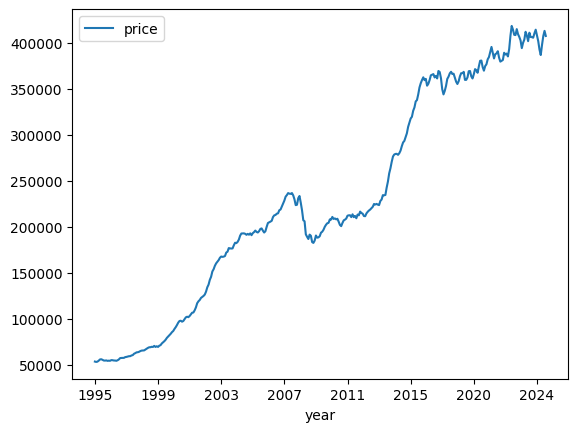

In [ ]:
df_newham.plot(kind='line', x='year', y='price')
plt.show()

**3. Modeling**
Calculating the ratio of the Average Price for 1998 divided by the Average Price for 2018.


In [ ]:
# function that will calculate a ratio of house prices, comparing the price of a house in 2018 to the price in 1998.
def create_price_ratio(dfg):
  year_filtered = dfg[(dfg['year']>= 1998) & (dfg['year']<=2018)]
  group_mean = year_filtered.groupby('year').agg({'price':'mean'}).round(2)

  ratio = group_mean.loc[1998]/group_mean.loc[2018]
  return ratio

create_price_ratio(df[df['borough']=='Camden'])

,0
price,0.202673


In [ ]:
# Itereate through all Unique boroughs
def price_ratio_unique_boroughs(df):

  ration_df = pd.DataFrame(columns=['borough','price_ratio_1998_2018'])
  results=[]
  unique_boroughs = df['borough'].unique()
  for b in unique_boroughs:
    dfg = df[df['borough']==b]
    dfg_year = dfg[(dfg['year']>=1998) & (dfg['year']<=2018)]
    group_year = dfg_year.groupby('year').agg({'price':'mean'}).round(2)
    ratio= group_year.loc[1998]/group_year.loc[2018]
    results.append({'borough': b , 'price_ratio_1998_2018' : round(float(ratio),2)})

  ration_df = pd.DataFrame(results)
  return ration_df

ratio_df = price_ratio_unique_boroughs(df)
print(ratio_df)

                 borough  price_ratio_1998_2018
0     Barking & Dagenham                   0.20
1                 Barnet                   0.23
2                 Bexley                   0.24
3                  Brent                   0.20
4                Bromley                   0.24
5                 Camden                   0.20
6                Croydon                   0.24
7                 Ealing                   0.23
8                Enfield                   0.23
9              Greenwich                   0.21
10               Hackney                   0.16
11  Hammersmith & Fulham                   0.24
12              Haringey                   0.19
13                Harrow                   0.25
14              Havering                   0.23
15            Hillingdon                   0.24
16              Hounslow                   0.25
17             Islington                   0.21
18  Kensington & Chelsea                   0.20
19  Kingston upon Thames                

<ipython-input-294-e71d0434a0db>:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  results.append({'borough': b , 'price_ratio_1998_2018' : round(float(ratio),2)})


                 borough  price_ratio_1998_2018
16              Hounslow                   0.25
13                Harrow                   0.25
25  Richmond upon Thames                   0.25
6                Croydon                   0.24
15            Hillingdon                   0.24
11  Hammersmith & Fulham                   0.24
27                Sutton                   0.24
4                Bromley                   0.24
2                 Bexley                   0.24
7                 Ealing                   0.23
8                Enfield                   0.23
14              Havering                   0.23
1                 Barnet                   0.23
19  Kingston upon Thames                   0.23
28         Tower Hamlets                   0.22
24             Redbridge                   0.22
9              Greenwich                   0.21
22                Merton                   0.21
30            Wandsworth                   0.21
17             Islington                

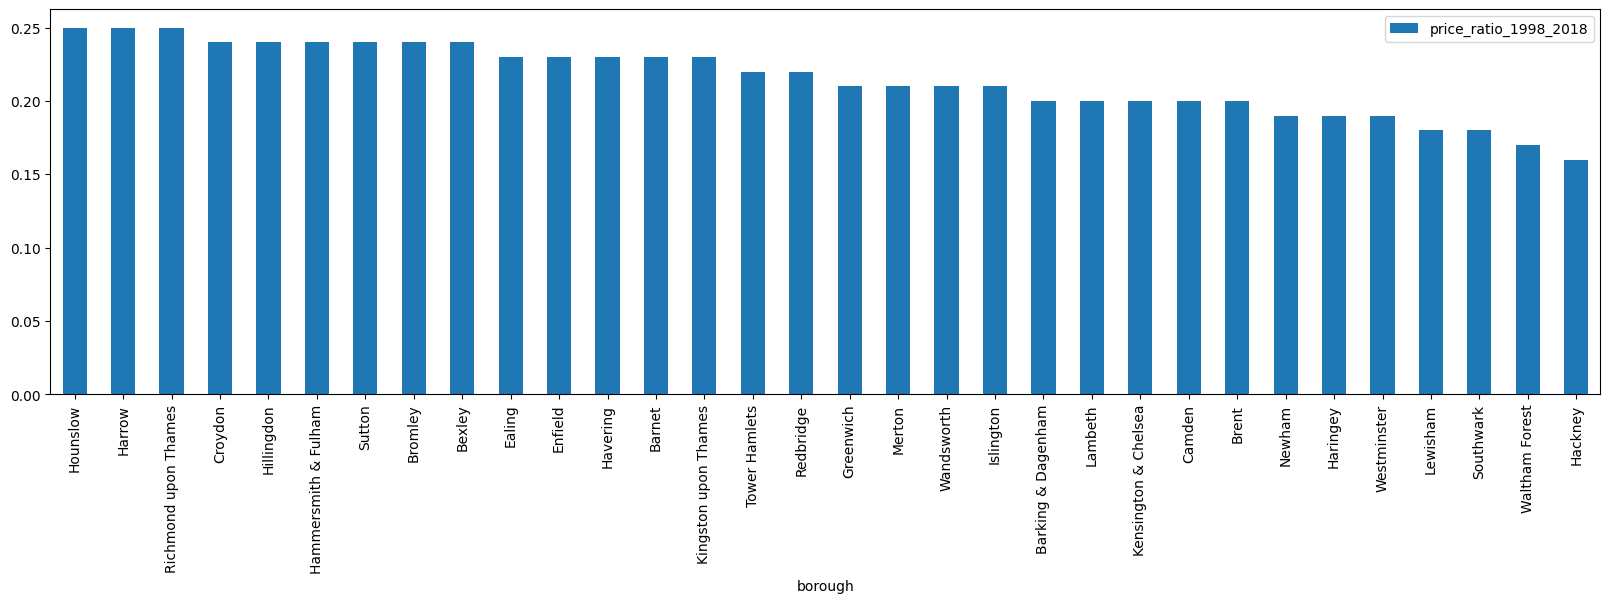

In [ ]:
sorted = ratio_df.sort_values('price_ratio_1998_2018',ascending=False)
print(sorted)
sorted.plot(kind='bar', x='borough', y='price_ratio_1998_2018', figsize=(20,5))
plt.show()

In [ ]:
print("Top 3 boroughs price increased from 1998 to 2018")
print(sorted.head(3))

print()
print("Last 3 boroughs price increased from 1998 to 2018")
print(sorted.tail(3))

Top 3 boroughs price increased from 1998 to 2018
                 borough  price_ratio_1998_2018
16              Hounslow                   0.25
13                Harrow                   0.25
25  Richmond upon Thames                   0.25

Last 3 boroughs price increased from 1998 to 2018
           borough  price_ratio_1998_2018
26       Southwark                   0.18
29  Waltham Forest                   0.17
10         Hackney                   0.16


**Conclusion**
1. The Prices were gradually increased across all borough from 1998 to 2018.
2. The top take aways are the boroughs like Hounslow, Harrow, Richmond upon Thames were increased at the top rates compared to other boroughs. It had 25% increase in 2018 compared to 1998.
3. boroughs like Southwark, Waltham Forest, Hackney were least in appreciating compared to other boroughs in London. It had 18%, 17%, 16% increase in 2018 compared to 1998.